## Brief Analyse des Ventes

#### Contexte du projet:

Vous commencez votre mission en tant que Data Analyst chez une enseigne de Retail. On vous a donné accès à leur base de données pour analyse exploratoire : Produits, clients et ventes.


#  Faire une analyse exploratoire des 3 fichiers fournis, identifier toutes les anomalies du dataset.

on va faire des premières observations :

In [43]:
# on commence par importer les librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.Clients

In [3]:
df_clients = pd.read_csv('clients.csv')

In [4]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


#### Ce fichier comprend trois colonnes:
client_id -> l'id de chaque client

sex -> le genre du client ('m','f')

birth -> l'année de naissance du client

In [6]:
df_clients.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [7]:
df_clients.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


## 2.Produits

In [8]:
df_produits = pd.read_csv('produits.csv')

In [9]:
df_produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


#### Ce fichier comprend trois colonnes:
id_produit -> l'id de chaque produit

price -> le prix de chaque produit

categ -> la categorie de chaque produit

In [10]:
df_produits.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


On remarque un prix négatif donc je préfère le supprimer

In [11]:
df_produits = df_produits[df_produits['price']>0]
df_produits.describe()

,price,categ
count,3286.000000,3286.000000
mean,21.863597,0.370359
std,29.849786,0.615446
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.075000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [12]:
df_produits.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


## 3.Ventes

In [13]:
df_ventes = pd.read_csv('ventes.csv')

In [14]:
df_ventes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


#### Ce fichier comprend quatre colonnes:

id_prod -> l'id du produit vendu dans la commande

date -> la date de la commande

session_id -> l'id de la session durant laquelle la commande a été passée

client_id -> l'id du client qui a passé la commande


In [15]:
df_ventes.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


On remarque un problème avec date (test_...), je vais corriger cela

In [16]:
df_ventes['date'].apply(type).value_counts()
# pas de types incohérents juste une valeur avec test devant, passons au nettoyage:

# Étape 1 : Supprimer les lignes contenant des dates invalides (par exemple commençant par 'test_')
df_ventes = df_ventes[~df_ventes['date'].astype(str).str.startswith('test_')]

# Étape 2 : Convertir la colonne en datetime
df_ventes['date'] = pd.to_datetime(df_ventes['date'], errors='coerce')

# Étape 3 : Supprimer les lignes non convertibles (valeurs restantes non interprétables comme des dates)
df_ventes = df_ventes.dropna(subset=['date'])

# Vérification finale
print(df_ventes['date'].dtypes)


datetime64[ns]


In [17]:
df_ventes.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


## Gestion des valeurs manquantes

In [18]:
print(df_clients.isnull().sum())

client_id    0
sex          0
birth        0
dtype: int64


In [19]:
print(df_produits.isnull().sum())

id_prod    0
price      0
categ      0
dtype: int64


In [20]:
print(df_ventes.isnull().sum())

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


On peut constater qu'il n'ya pas de valeurs nulles.


#### On va extraire des infos pour des analyses futures:
Déjà l'année:

In [21]:
# Extraire l'année en crééant une colonne 'année'
df_ventes['année'] = df_ventes['date'].dt.year

Ensuite le mois:

In [22]:
# Extraire le mois en crééant une colonne 'mois'
df_ventes['mois'] = df_ventes['date'].dt.month

Puis le jour:

In [23]:
# Extraire le jour en crééant une colonne 'jour'
df_ventes['jour'] = df_ventes['date'].dt.day

#### Maintenant que la base est propre, nous allons fusionner les tables:

Commençons par ventes et clients avec client_id

In [24]:
df_merged = df_ventes.merge(df_clients, on='client_id', how='left')
df_merged.head()

,id_prod,date,session_id,client_id,année,mois,jour,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022,5,20,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022,2,2,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022,6,18,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021,6,24,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023,1,11,m,1980


Puis avec produits avec id_prod

In [25]:
df_merged = df_merged.merge(df_produits, on='id_prod', how='left',indicator=True)
df_merged.head(30)
df_merged[df_merged._merge=="left_only"]

,id_prod,date,session_id,client_id,année,mois,jour,sex,birth,price,categ,_merge
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,2022,9,23,m,1940,NaN,NaN,left_only
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,2022,7,23,f,1963,NaN,NaN,left_only
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,2022,12,3,m,1978,NaN,NaN,left_only
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,2021,8,16,m,1991,NaN,NaN,left_only
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,2022,7,16,m,1973,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...
669533,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,2021,8,25,m,1981,NaN,NaN,left_only
670484,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,2022,3,6,f,1979,NaN,NaN,left_only
671088,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,2022,5,16,m,1981,NaN,NaN,left_only
675480,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,2022,2,11,m,1986,NaN,NaN,left_only


on remarque un problème pour le produit 0_2245, je vais essayer d'y remédier en allant chercher les infos dans df_produits

il n'apparait pas dans produits mais 221 fois dans ventes.

In [26]:
df_produits[df_produits['id_prod']=='0_2245']
df_ventes[df_ventes['id_prod']=='0_2245']

,id_prod,date,session_id,client_id,année,mois,jour
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,2022,9,23
10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,2022,7,23
11727,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,2022,12,3
15675,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,2021,8,16
16377,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,2022,7,16
...,...,...,...,...,...,...,...
669730,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,2021,8,25
670682,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,2022,3,6
671286,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,2022,5,16
675679,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,2022,2,11


je vais créer une dataframe sans les valeurs nulles pour les calculs

In [27]:
df_merged_clean = df_merged.dropna(subset=['price', 'categ'])

In [28]:
df_merged_clean.info()
df_merged_clean.head()
df_merged_clean.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 679111 entries, 0 to 679331
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   année       679111 non-null  int32         
 5   mois        679111 non-null  int32         
 6   jour        679111 non-null  int32         
 7   sex         679111 non-null  object        
 8   birth       679111 non-null  int64         
 9   price       679111 non-null  float64       
 10  categ       679111 non-null  float64       
 11  _merge      679111 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int32(3), int64(1), object(4)
memory usage: 55.1+ MB


id_prod       0
date          0
session_id    0
client_id     0
année         0
mois          0
jour          0
sex           0
birth         0
price         0
categ         0
_merge        0
dtype: int64

On voit encore un problème avec birth, on va le nettoyer

In [29]:
# Étape 1 : supprimer les NaN (si ce n’est pas déjà fait)
df_merged_clean = df_merged.dropna(subset=['birth'])

# Étape 2 : convertir en entier
df_merged_clean['birth'] = df_merged_clean['birth'].astype(int)

df_merged_clean['birth'].sort_values().head(50)

312522    1929
96457     1929
405572    1929
661086    1929
70609     1929
307613    1929
156045    1929
231074    1929
138833    1929
606684    1929
5923      1929
43975     1929
299505    1929
656779    1929
326154    1929
361479    1929
518804    1929
140092    1929
313779    1929
24152     1929
125072    1929
575309    1929
389331    1929
312198    1929
309873    1929
268039    1929
482736    1929
513635    1929
44336     1929
510558    1929
8788      1929
137604    1929
638685    1929
634460    1929
502893    1929
136629    1929
172198    1929
217598    1929
267744    1929
53099     1929
493003    1929
535438    1929
273793    1929
648142    1929
473392    1929
304870    1929
29361     1929
409051    1929
142617    1929
142592    1929
Name: birth, dtype: int64

En observant les entrées, j'ai trouvé des aberrations comme des dates négatives ou très basses, donc nettoyage

In [30]:
df_merged_clean = df_merged_clean[df_merged_clean['birth'] >= 1929]
df_merged_clean['birth'].sort_values().head(50)
df_merged_clean.isnull().sum()

id_prod         0
date            0
session_id      0
client_id       0
année           0
mois            0
jour            0
sex             0
birth           0
price         221
categ         221
_merge          0
dtype: int64

Renommons les catégories pour plus de pertinence en utilisant un dictionnaire de correspondances

In [31]:
categ_labels = {
    0: 'Entrée de gamme',
    1: 'Standard',
    2: 'Premium'
}
df_merged_clean['categ_labels'] = df_merged_clean['categ'].map(categ_labels)
df_merged_clean.isnull().sum()

id_prod           0
date              0
session_id        0
client_id         0
année             0
mois              0
jour              0
sex               0
birth             0
price           221
categ           221
_merge            0
categ_labels    221
dtype: int64

On créée une colonne âge pour faire des tranches d'âge ensuite

In [32]:
df_merged_clean['age']=2025-df_merged_clean['birth'].astype(int)

# créer les tranches d'âge
bins = [0,18,25,35,45,60,75,100]
labels = ['<18','18-24','25-34','35-44','45-59','60-74','75+']
df_merged_clean['tranche_age'] = pd.cut(df_merged_clean['age'], bins=bins, labels=labels, right=False)

Maintenant la df est propre et fonctionnelle

### Passons à un rapport EDA pour observer les axes d'analyse pertinents:

In [33]:
import warnings 
warnings.filterwarnings('ignore')                  #just ignoring all warnings

from ydata_profiling import ProfileReport        #install using pip install pandas-profiling

In [34]:
profile = ProfileReport(df_merged_clean,explorative=True,title='BRIEF VENTES EXPLORATIVE DATA ANALYSIS')  #creating a report 

### Créer le rapport EDA sous forme html

In [35]:
profile.to_file("brief_ventes.html")        #it creates interactive html page showing eda

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:17<00:00,  1.15s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
df_merged_clean.to_csv('brief_ventes_clean.csv')

## Faire une analyse du CA de cette enseigne, interpréter les résultats

### Commençons avec le chiffre d'affaires par mois

In [40]:
mois_labels = {
    1 : 'Janvier',
    2 : 'Février',
    3 : 'Mars',
    4 : 'Avril',
    5 : 'Mai',
    6 : 'Juin',
    7 : 'Juillet',
    8 : 'Août',
    9 : 'Septembre',
    10 : 'Octobre',
    11 : 'Novembre',
    12 : 'Décembre'
}
df_merged_clean['mois_labels'] = df_merged_clean['mois'].map(mois_labels)

# Liste des mois dans l'ordre voulu
mois_ordre = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin',
              'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']

# Convertir la colonne 'mois_labels' en type catégorie ordonnée
ca_par_mois['mois_labels'] = pd.Categorical(
    ca_par_mois['mois_labels'],
    categories=mois_ordre,
    ordered=True
)

# Trier les données par année puis par mois
ca_par_mois = ca_par_mois.sort_values(by=['année', 'mois_labels'])

print(ca_par_mois)

    année mois_labels      price
6    2021        Mars  482440.61
1    2021       Avril  476109.30
5    2021         Mai  492943.47
4    2021        Juin  484088.56
3    2021     Juillet  482835.40
0    2021        Août  482284.79
9    2021   Septembre  507240.68
8    2021     Octobre  320798.74
7    2021    Novembre  516167.73
2    2021    Décembre  525917.28
14   2022     Janvier  525338.99
13   2022     Février  535571.50
18   2022        Mars  515456.53
11   2022       Avril  492998.94
17   2022         Mai  517132.60
16   2022        Juin  496016.12
15   2022     Juillet  510783.12
10   2022        Août  506467.27
21   2022   Septembre  494114.53
20   2022     Octobre  507917.77
19   2022    Novembre  496664.94
12   2022    Décembre  510219.50
23   2023     Janvier  517540.55
22   2023     Février  456679.76


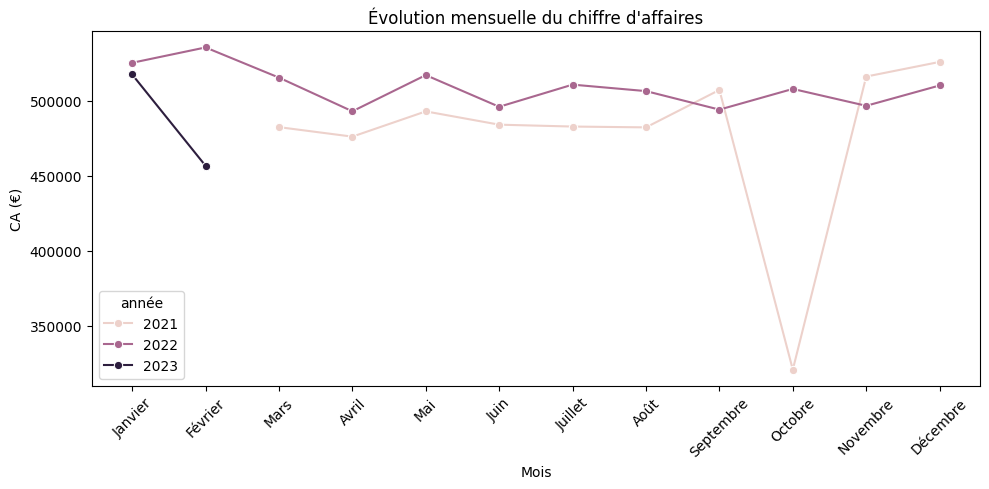

In [45]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=ca_par_mois, x='mois_labels', y='price', hue='année', marker='o')
plt.title("Évolution mensuelle du chiffre d'affaires")
plt.xlabel("Mois")
plt.ylabel("CA (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2022 est l’année avec le meilleur CA mensuel moyen, malgré quelques variations.

2021 reste globalement en retrait, sauf en fin d’année où elle dépasse 2022.

En octobre 2021, on observe une chute brutale du CA (≈ 320 000 €), très anormale par rapport au reste des données.

2023 est incomplet, avec des données seulement sur janvier et février.

### Le chiffre d'affaires par jour de la semaine

In [46]:
df_merged_clean['jour_semaine'] = df_merged_clean['date'].dt.day_name()

df_merged_clean['num_jour_semaine'] = df_merged_clean['date'].dt.weekday

jours_traduits = {
    'Monday': 'Lundi',
    'Tuesday': 'Mardi',
    'Wednesday': 'Mercredi',
    'Thursday': 'Jeudi',
    'Friday': 'Vendredi',
    'Saturday': 'Samedi',
    'Sunday': 'Dimanche'
}
df_merged_clean['jour_semaine'] = df_merged_clean['date'].dt.day_name().map(jours_traduits)

df_merged_clean.groupby('jour_semaine')['price'].sum()


jour_semaine
Dimanche    1689114.95
Jeudi       1692326.65
Lundi       1714150.94
Mardi       1711537.09
Mercredi    1686788.97
Samedi      1675501.18
Vendredi    1684308.90
Name: price, dtype: float64

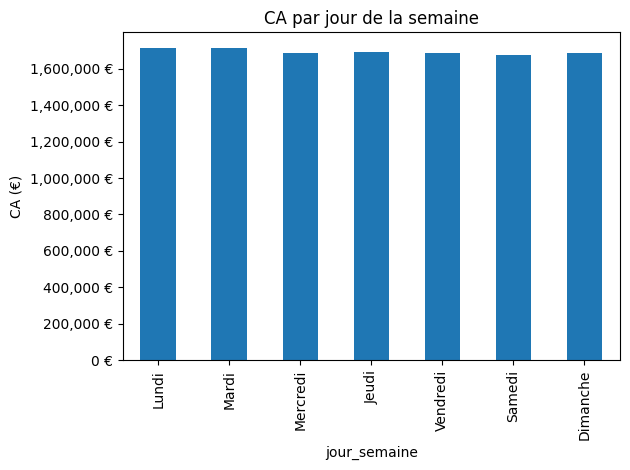

In [48]:
import matplotlib.ticker as mtick

df_merged_clean.groupby('jour_semaine')['price'].sum().reindex(
    ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
).plot(kind='bar', title='CA par jour de la semaine', ylabel='CA (€)')

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f} €'))
plt.tight_layout()
plt.show()

Le chiffre d'affaires est remarquablement uniforme sur tous les jours.

Il oscille entre 1,65M€ et 1,70M€, avec très peu de variation d’un jour à l’autre.

Aucun jour ne se distingue par un pic ou une baisse notable.

### Le chiffre d'affaires par tranches d'âge

In [49]:
ca_par_age = df_merged_clean.groupby('tranche_age')['price'].sum().sort_values(ascending=False)
print(ca_par_age)

tranche_age
45-59    3814493.43
35-44    2619779.37
25-34    2369105.34
60-74    1431316.80
18-24    1149884.52
75+       469149.22
<18            0.00
Name: price, dtype: float64


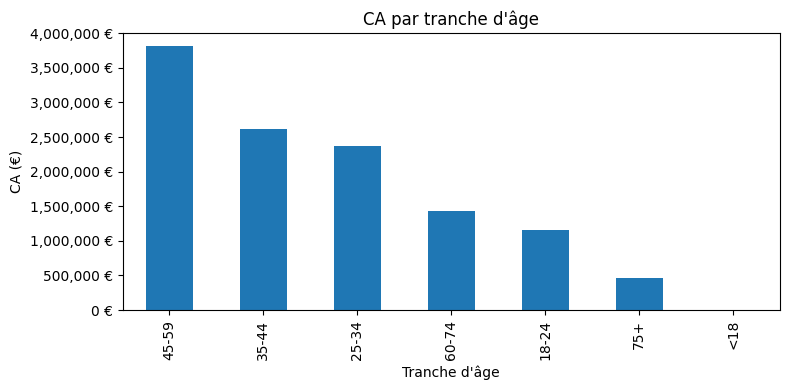

In [50]:
df_age_ca = df_merged_clean.groupby('tranche_age')['price'].sum().sort_values(ascending=False)

df_age_ca.plot(kind='bar', figsize=(8,4), title="CA par tranche d'âge", ylabel="CA (€)", xlabel="Tranche d'âge")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f} €'))
plt.tight_layout()
plt.show()

###  Analyse du chiffre d'affaires par tranche d'âge

La répartition du chiffre d'affaires par tranche d'âge met en évidence une **forte concentration sur les 45–59 ans**, qui constituent la **principale source de revenus** de l’enseigne. Ce groupe génère près de 4 millions d’euros de CA, soit une part très significative.

Derrière eux, les **35–44 ans** et **25–34 ans** suivent avec des contributions également importantes, ce qui confirme l’intérêt stratégique de ces groupes pour les offres à valeur ajoutée.

À l’inverse, les **moins de 25 ans** et les **plus de 75 ans** génèrent un chiffre d’affaires bien plus limité, ce qui souligne :
- une **faible implication des jeunes** dans les achats (probablement étudiants ou dépendants financièrement),
- et une **baisse d'activité chez les seniors**, liée à des besoins réduits ou une consommation plus modérée.

 Cette visualisation confirme les segments **à fort potentiel de rentabilité** et oriente les actions marketing vers les tranches d’âge les plus contributrices.
 

#### Le chiffre d'Affaires par catégorie

In [51]:
df_merged_clean.groupby('categ_labels')['price'].sum()

categ_labels
Entrée de gamme    4419730.97
Premium            2780275.02
Standard           4653722.69
Name: price, dtype: float64

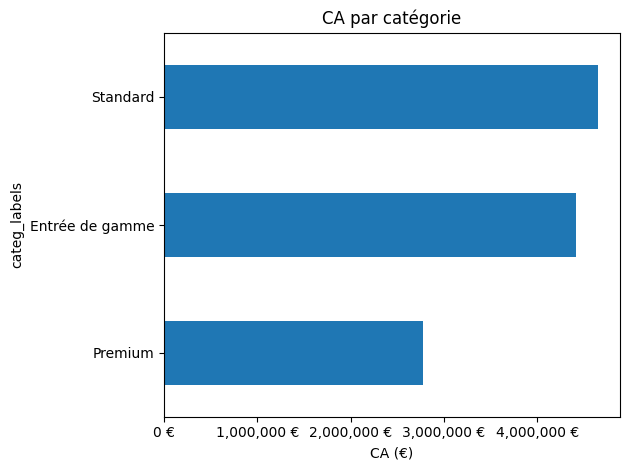

In [52]:
df_merged_clean.groupby('categ_labels')['price'].sum().sort_values().plot(kind='barh', title="CA par catégorie")
plt.xlabel("CA (€)")
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f} €'))
plt.tight_layout()
plt.show()


### Analyse du chiffre d'affaires par catégorie de produits

Cette visualisation montre une **répartition claire du chiffre d'affaires par catégorie** :

- **Standard** et **Entrée de gamme** sont les deux segments les plus performants, chacun générant plus de **4 millions d’euros** de CA. Cela suggère une forte demande sur les produits abordables et fonctionnels.
  
- Le **Premium**, bien qu’en retrait, atteint tout de même près de **3 millions d’euros**, ce qui démontre l’existence d’une clientèle prête à investir dans des produits plus qualitatifs.

 On observe donc que :
- Les volumes sont largement portés par le milieu et le bas de gamme.
- Le Premium, malgré un plus faible volume, reste stratégique, surtout auprès des jeunes adultes (comme vu précédemment).

 **Implication stratégique** :
Il est pertinent de maintenir une **offre équilibrée entre accessibilité et valorisation** produit, tout en adaptant le discours selon la cible (prix vs image).


### Chiffre d'Affaires croisé par catégorie et tranches d'âge

In [53]:
# Table croisée : CA par catégorie et tranche d’âge
ca_categ_age = df_merged_clean.pivot_table(values='price', index='tranche_age', columns='categ_labels', aggfunc='sum', fill_value=0)

# Affichage
print(ca_categ_age)

categ_labels  Entrée de gamme     Premium    Standard
tranche_age                                          
<18                      0.00        0.00        0.00
18-24                67286.44   862037.32   220560.76
25-34               248074.73  1646899.15   474131.46
35-44              1601593.77    67735.15   950450.45
45-59              1977790.73   120095.49  1716607.21
60-74               393662.53    64638.68   973015.59
75+                 131322.77    18869.23   318957.22


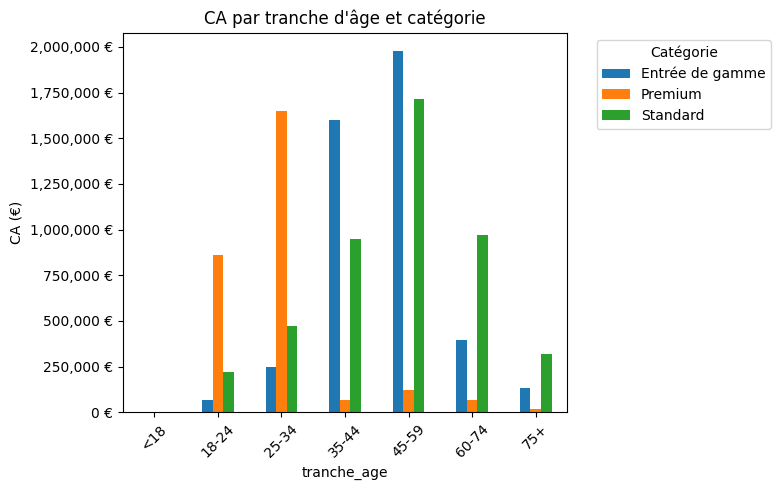

In [54]:
ca_categ_age.plot(kind='bar', figsize=(8,5), title="CA par tranche d'âge et catégorie", ylabel='CA (€)')
plt.xticks(rotation=45)
plt.legend(title="Catégorie", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f} €'))
plt.tight_layout()
plt.show()

### Analyse croisée du chiffre d’affaires par tranche d’âge et catégorie

Ce graphique met en évidence la manière dont chaque **tranche d’âge** contribue au chiffre d’affaires selon la **catégorie de produit** :

-  **Entrée de gamme** :
  - Dominée par les **45–59 ans** et **35–44 ans**.
  - Encore significative chez les **60–74 ans**.
  - Presque inexistante chez les jeunes (<25 ans).
  - Suggestion : cibler les seniors avec des offres simples et accessibles.

-  **Premium** :
  - Très populaire chez les **25–34 ans**, qui constituent la **tranche la plus dépensière sur cette catégorie**.
  - Les autres tranches y sont peu sensibles.
  - Opportunité : accentuer le **branding** ou le **produit exclusif** pour séduire les jeunes adultes.

-  **Standard** :
  - Montée progressive dès 25 ans, avec un **pic chez les 45–59 ans**.
  - Représente une **offre d’équilibre** pour la majorité des tranches d’âge.

 **Implication stratégique** :
Adapter les offres et campagnes marketing selon le **profil âge/catégorie** est une voie efficace pour optimiser les ventes.


### Chiffre d'affaires croisé par jour de la semaine et par catégorie

In [55]:
ca_categ_jour = df_merged_clean.pivot_table(values='price', index='jour_semaine', columns='categ_labels', aggfunc='sum', fill_value=0)

print(ca_categ_jour)

categ_labels  Entrée de gamme    Premium   Standard
jour_semaine                                       
Dimanche            637126.09  390703.13  661285.73
Jeudi               625643.90  401054.63  665628.12
Lundi               635227.77  413539.16  665384.01
Mardi               639710.43  394246.10  677580.56
Mercredi            636485.81  384355.17  665947.99
Samedi              622659.15  395314.21  657527.82
Vendredi            622877.82  401062.62  660368.46


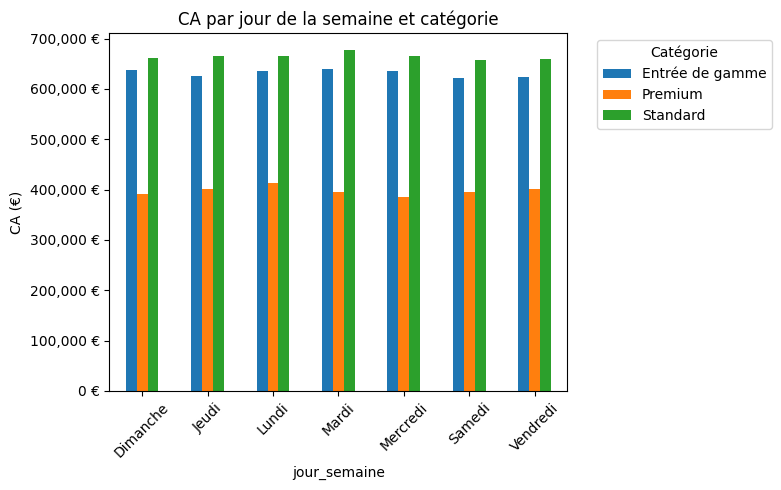

In [56]:
ca_categ_jour.plot(kind='bar', figsize=(8,5), title="CA par jour de la semaine et catégorie", ylabel='CA (€)')
plt.xticks(rotation=45)
plt.legend(title="Catégorie", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f} €'))
plt.tight_layout()
plt.show()

### Répartition du chiffre d’affaires par jour de la semaine et par catégorie

Ce graphique met en évidence une **répartition relativement homogène du chiffre d’affaires tout au long de la semaine**, toutes catégories confondues.

-  **Standard** : 
  - Catégorie la plus génératrice de CA chaque jour.
  - Légèrement plus élevé le **mardi**, sans creux net dans la semaine.

-  **Entrée de gamme** : 
  - CA stable sur tous les jours, avec de **légères baisses le mercredi et vendredi**.
  - Présente un volume important, deuxième catégorie la plus performante.

-  **Premium** : 
  - Moins élevée mais **constante**, notamment du **lundi au jeudi**, avec une **légère baisse le week-end**.
  - Cela peut refléter une consommation en semaine, liée à un public actif.

 **À retenir** :
- Aucun jour ne se distingue comme creux ou exceptionnel.
- Les trois catégories conservent une présence constante.
- Cela suggère un **comportement d’achat bien réparti** sur la semaine, avec des ajustements possibles pour renforcer les jours les moins performants.


##  Interprétation générale – CA par tranche d’âge et catégorie

### 1. La tranche **45–59 ans** domine clairement le chiffre d'affaires
- Représente le **pic d’activité**, toutes catégories confondues.
- Forte affinité avec l’**entrée de gamme** et le **standard**.
- ➕ **Cible prioritaire** : fort pouvoir d’achat + volume élevé.

### 2. Les **25–34 ans** sont les plus orientés vers le **Premium**
- Seule tranche où le Premium dépasse les autres gammes.
- Jeunes adultes **sensibles à l’image, à la qualité**.
- ➕ Segment à fort potentiel pour des stratégies de **valorisation produit** (upsell, exclusivités).

### 3. Le **Standard** séduit principalement les **35–59 ans**
- Peu adopté par les jeunes.
- **Croissance progressive avec l’âge**, puis stabilité.
- ➕ Positionnement clé pour une **offre de volume**.

### 4. L’**entrée de gamme** attire surtout les **plus de 45 ans**
- Très forte chez les **45–59 ans**, encore présente chez les **60–74 ans**.
- **Quasi absente chez les <25 ans**, qui préfèrent soit le Premium, soit ne consomment pas.
- ➕ Segment fonctionnel, à **budget maîtrisé**.

### 5. Les **75+ ans** achètent peu, mais restent présents
- Préférence pour les produits **simples** (entrée de gamme, standard).
- ➕ Clientèle **fidèle et discrète**, à considérer.

### 6. Les **<18 ans** sont absents ou anecdotiques
- Logique : **non-clients directs**, peu de données associées.

---

##  Pistes d’action stratégiques

| Tranche d’âge | Recommandation stratégique |
|---------------|----------------------------|
| **25–34 ans** | Miser sur le **branding Premium** (éditions limitées, storytelling) |
| **45–59 ans** | Renforcer la **fidélisation** et les **offres multi-achats** |
| **60–74 ans** | Adapter l’offre standard : **confort, simplicité, accompagnement** |
| **<24 ans**   | Stratégie d’entrée via le **digital** : offres de test, formats courts |

---

**Conclusion**  
> Cette analyse met en évidence des comportements d'achat clairement segmentés par âge.  
> Elle permet d’orienter les actions marketing vers les bonnes cibles avec une stratégie adaptée par gamme.


## Corrélations

### 1. Genre des clients vs catégories de produits
 Objectif : savoir si certaines catégories sont préférées par un genre.

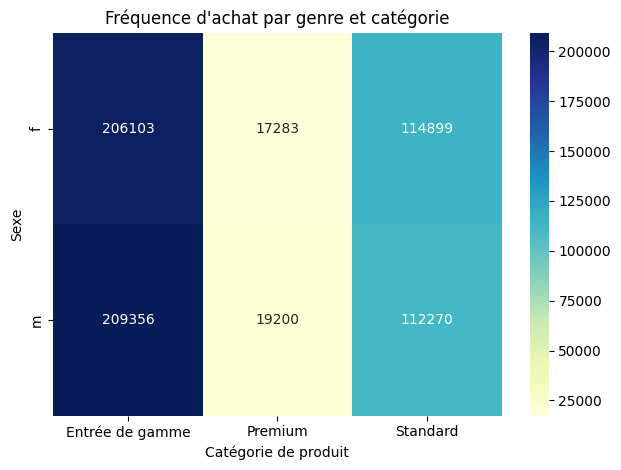

In [57]:
# Croiser genre et catégorie
genre_categ = df_merged_clean.groupby(['sex', 'categ_labels'])['price'].count().reset_index()

# Heatmap normalisée
pivot = genre_categ.pivot(index='sex', columns='categ_labels', values='price')
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Fréquence d'achat par genre et catégorie")
plt.xlabel("Catégorie de produit")
plt.ylabel("Sexe")
plt.tight_layout()
plt.show()

###  Répartition des achats selon le genre et la catégorie de produit

Cette heatmap montre que les comportements d’achat entre **hommes** et **femmes** sont très similaires en volume :

-  **Entrée de gamme** : 
  - Catégorie la plus achetée pour **les deux genres**, avec un volume quasi identique.
  - Légère avance chez les hommes (209 356 vs 206 103).

-  **Standard** : 
  - Deuxième catégorie la plus fréquente.
  - Légèrement plus plébiscitée par les **femmes** (114 899 vs 112 270).

-  **Premium** : 
  - Catégorie la moins achetée par les deux genres.
  - Léger avantage en volume chez les **hommes** (19 200 vs 17 283), mais globalement marginal.

 **À retenir** :
- La segmentation par genre ne révèle **aucune différence marquée** dans les préférences.
- Cela suggère que **les campagnes marketing peuvent rester unisexes**, sauf stratégie fine sur des sous-cibles.


### 2. Âge vs montant d'achat
 Corrélation continue : scatterplot + ligne de tendance.

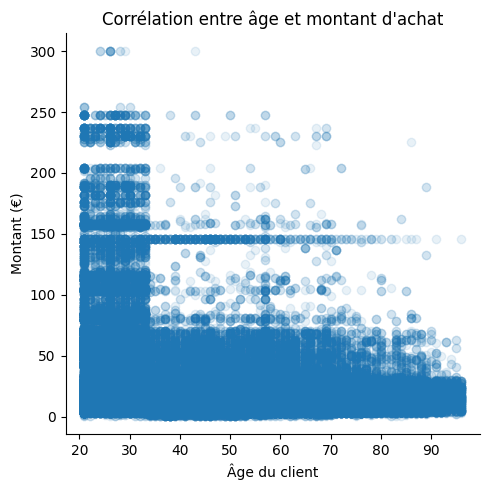

In [58]:
sns.lmplot(x='age', y='price', data=df_merged_clean, scatter_kws={'alpha':0.1})
plt.title("Corrélation entre âge et montant d'achat")
plt.xlabel("Âge du client")
plt.ylabel("Montant (€)")
plt.tight_layout()
plt.show()

###  Corrélation entre l'âge et le montant d'achat

Ce nuage de points met en évidence une **corrélation négative** entre l’âge des clients et le montant de leurs achats unitaires.

####  Observations clés :
- Les **plus jeunes clients** (20–35 ans) effectuent des achats plus élevés, certains dépassant les **200 €**.
- À mesure que l’âge augmente, le montant d'achat a tendance à **diminuer** :
  - Entre **40 et 70 ans**, les achats se concentrent autour de **50–150 €**.
  - Passé **75 ans**, la majorité des montants est **inférieure à 50 €**.
  
####  Interprétations possibles :
- Les jeunes adultes peuvent privilégier des produits plus coûteux (ex. Premium).
- Les clients plus âgés semblent adopter un **comportement plus économique** et/ou faire des achats plus **fonctionnels** ou **répétés mais de faible montant**.

 **À retenir** :
> Le montant d'achat décroît globalement avec l’âge, ce qui peut orienter les stratégies tarifaires ou les offres ciblées.


### 3. Âge vs fréquence d'achat
 Fréquence = nombre d’achats par client.

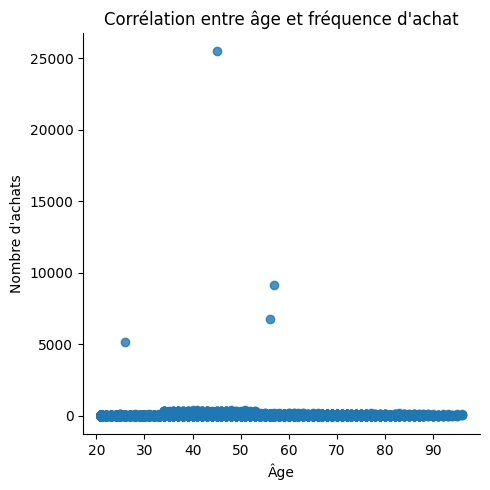

In [59]:
freq_age = df_merged_clean.groupby('client_id').agg(
    nb_achats=('price', 'count'),
    age=('age', 'first')
)

sns.lmplot(x='age', y='nb_achats', data=freq_age)
plt.title("Corrélation entre âge et fréquence d'achat")
plt.xlabel("Âge")
plt.ylabel("Nombre d'achats")
plt.tight_layout()
plt.show()

Pas de relation linéaire claire entre l’âge et le nombre d’achats.

On observe néanmoins des pics très marqués entre 45 et 59 ans, avec des volumes d’achats nettement supérieurs aux autres classes d’âge.

Les autres tranches d’âge réalisent beaucoup moins d’achats, et la densité est très concentrée sous les 1 000 achats.

### 4. Âge vs taille du panier moyen
 Taille panier = montant moyen par achat d’un client.

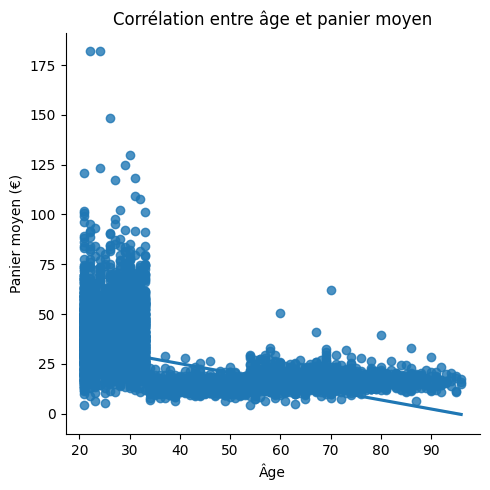

In [60]:
panier_age = df_merged_clean.groupby('client_id').agg(
    panier_moyen=('price', 'mean'),
    age=('age', 'first')
)

sns.lmplot(x='age', y='panier_moyen', data=panier_age)
plt.title("Corrélation entre âge et panier moyen")
plt.xlabel("Âge")
plt.ylabel("Panier moyen (€)")
plt.tight_layout()
plt.show()


On observe une corrélation négative claire :
plus l’âge augmente, plus le panier moyen tend à diminuer.

Les plus jeunes clients (20–35 ans) réalisent des paniers plus élevés, parfois au-dessus de 100 €.

À partir de 40 ans, les paniers deviennent nettement plus modestes, avec une forte concentration entre 10 € et 30 €.

### 5. Âge des clients vs types de produits achetés
Heatmap entre tranches d'âge et catégories

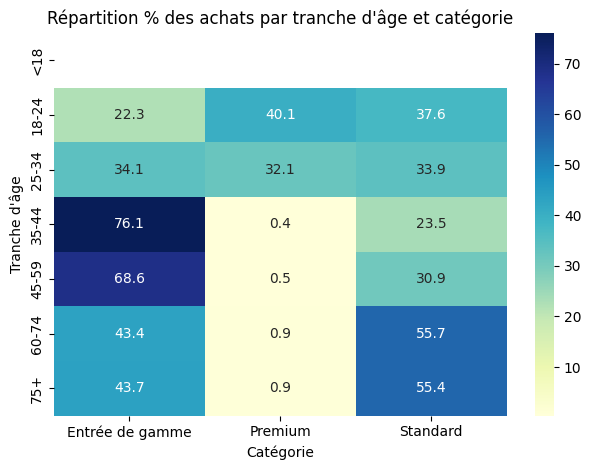

In [61]:
age_categ = df_merged_clean.groupby(['tranche_age', 'categ_labels'])['price'].count().reset_index()
pivot2 = age_categ.pivot(index='tranche_age', columns='categ_labels', values='price')

pivot_pct = pivot2.div(pivot2.sum(axis=1), axis=0) * 100

sns.heatmap(pivot_pct, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title("Répartition % des achats par tranche d'âge et catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Tranche d'âge")
plt.tight_layout()
plt.show()



##  Conclusion générale

###  Synthèse des comportements d’achat selon l’âge et la catégorie

Les analyses croisées entre l'âge, la fréquence d’achat, le montant et les catégories de produits révèlent des **comportements d’achat bien différenciés selon les tranches d’âge** :

- **Les 45–59 ans** sont les clients les plus actifs : ils génèrent le plus de chiffre d’affaires, avec une forte affinité pour l’**entrée de gamme**. Leur volume d’achat en fait une **cible stratégique** pour les actions de fidélisation.

- **Les 25–34 ans** privilégient clairement le **Premium**, une tendance unique parmi les tranches d’âge. Ils recherchent la qualité ou l’image, et sont sensibles aux stratégies de **valorisation produit** (branding, exclusivité).

- **Les seniors (60–74 ans et 75+)** tendent vers le **Standard**, suggérant un besoin de confort, de simplicité ou de stabilité. L’entrée de gamme reste présente mais diminue progressivement.

- **Les jeunes (18–24 ans)** se répartissent de manière équilibrée entre les trois catégories. Ils se distinguent par leur ouverture au Premium, malgré un budget potentiellement plus restreint.

- **Les <18 ans** sont presque absents des données, probablement car ils ne sont pas directement clients.

---

###  Recommandations data-driven

| Segment         | Action recommandée                                        |
|-----------------|-----------------------------------------------------------|
| **25–34 ans**   | Travailler l’image du Premium (branding, réseaux sociaux) |
| **45–59 ans**   | Programmes de fidélité & offres multi-achats              |
| **60–74 ans**   | Adapter le Standard avec plus de confort & clarté         |
| **18–24 ans**   | Proposer des offres découverte ou digitales ciblées       |

---

Cette segmentation comportementale issue des données peut servir de **base solide pour orienter les campagnes marketing, les choix de gammes produits et la politique tarifaire**, en ciblant les bons profils avec les bons leviers.

